https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/ecm.1470   
https://www.researchgate.net/publication/2544541_Markov_Random_Field_Extensions_using_State_Space_Models   
https://kevinkotze.github.io/ts-4-state-space/#fn5    
https://www.researchgate.net/publication/323619337_Review_of_State-Space_Models_for_Fisheries_Science
https://towardsdatascience.com/first-bayesian-state-space-model-with-pymc3-51cbb06ef8bd   
https://sidravi1.github.io/blog/2020/06/20/linear-gaussian-state-space-models  

https://python.quantecon.org/linear_models.html   
https://hazyresearch.stanford.edu/blog/2022-01-14-s4-2    

https://arxiv.org/abs/2003.14162   
https://www.tandfonline.com/doi/full/10.1080/24754269.2019.1677085   
https://en.wikipedia.org/wiki/Markov_chain    
https://www.researchgate.net/publication/260296350_Estimation_of_time-varying_selectivity_in_stock_assessments_using_state-space_models  
https://assets.amazon.science/0b/93/4117a5014af5a5dd487d7ffd74ab/deep-state-space-models-for-time-series-forecasting.pdf  


State-space models are a kind of hierarchical proposal that blends two unique wires: (1) A realization of a time series; (2) a state time series that specifies a prescription about the hidden and latent state of nature. There are two stochastic processes $X_t$ and $Y_t$, with index $t$ denoting distinct time steps, where $X_T$ is the unobserved state sequence for latent variables, and $Y_t$ is the observed vector and the response variable.    


The SSM relies on two assumptions. The first is that $X_t$ is a Markov process of a given order k > 0. The second assumption is  that the observations are conditionally independent: $Y_t$|$X_{1:\infty}$ is independent of $Y_s$|$X_{1:\infty}$. This implies that any dependence between the responses is caused by unobserved states.   

Markov process, or Markov chain, is a stochastic model describing a sequence of possible events, in which the probability of each event depends only on the current state.

Normal dynamic linear models(NDLMs) are a special case where state and observation are modeled with linear equations and normal distributions. Kalman filter is one of the primary inference proposals for NDLMs about hidden states given imperfect observations and known parameters. Nowdays, the principal libraries allow fitting SSM by means of the maximum likelihood estimator or `bayesianly`.

 

file:///tmp/mozilla_jean0/selpap.pdf    
https://sidravi1.github.io/blog/2020/06/20/linear-gaussian-state-space-models   
https://www.researchgate.net/publication/26410947_Density_dependence_in_North_American_ducks   
https://kevinkotze.github.io/ts-4-state-space/#fn5  


Most state-space models leverage a rather complex structure to model randomness: The Random Walk. The default case, Gaussian Random Walk, is a `discrete` white noise that shocks either ups or downs. On contrary to white noise, the Random Walk component can model time series that overcomes stationarity, owing to either volatile mean or covariance.

#### Developing intuition on simple State Space Model   

As we saw, a time series might be decomposed into three components.

$$ y_t = \mu_t + \gamma_t + \epsilon_t \quad t = 1,..,T $$

where,

* $\mu_t$ is the Trend.
* $\gamma_t$ is the Seasonal Component.
* $\epsilon_t$ is the residual.

Assuming a model without seasonal pattern, the Trend can be modeled as random walk process.

$$ x_{t+1} = x_t + \eta_t $$

We are ready to shape a simple linear state-space model.

$$ y_t = B x_t + \epsilon_t \quad \epsilon_t \sim N(0, Q_t) $$
$$ x_t = A x_{t-1} + \eta_t \quad \eta \sim N(0, R_t) $$



The `measurement equation` describes the relation between observed variables and the unobserved variables, whereas the `state equation` reflects the latent variables. 

In [20]:
import numpy as np

size = 200
np.random.seed(15)

z0 = 0.5
xt = np.zeros(size)
yt = np.zeros(size)

A = .5
B = 1.

Q = 2
R = 1.5


for i, u in enumerate(xt):
    if i == 0:
        xt[i] = z0
    else:
        xt[i] = A * xt[i - 1] + np.random.normal(0, Q)
    yt[i] = B * xt[i] + np.random.normal(0, R)

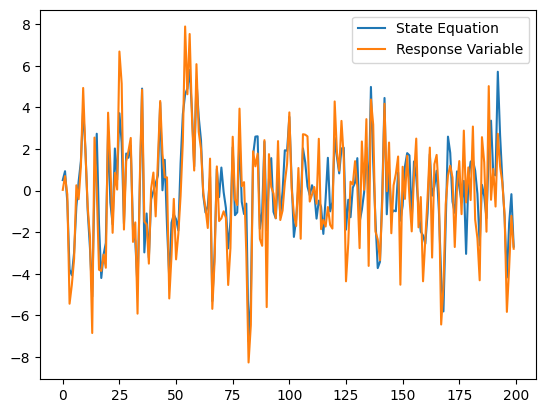

In [21]:
import matplotlib.pyplot as plt
  
# plot lines
plt.plot(list(range(len(xt))), xt, label = "State Equation")
plt.plot(list(range(len(xt))), yt, label = "Response Variable")
plt.legend()
plt.show()

In [22]:
import pymc3 as pm
import arviz as az

with pm.Model() as ar1:

    A_ = pm.Normal("A_", 0.0, 1.0)
    tau_ = pm.Exponential("tau", 0.5)
    
    x_ = pm.AR1("y", k=A_, tau_e=tau_, observed=np.zeros(size))

    B_ = pm.Normal("B_", 0, 2)
    y_mu = pm.Deterministic("y_mu", B * x_ )

    trace = pm.sample(1000, random_seed=42)
    idata = az.from_pymc3(trace)
    

/tmp/ipykernel_604734/1559710061.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, random_seed=42)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [B_, tau, A_]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.
There were 146 divergences after tuning. Increase `target_accept` or reparameterize.
There were 169 divergences after tuning. Increase `target_accept` or reparameterize.


/home/jean/dev/Github/Longitudinal_Data/venv/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/traceplot.py:214: UserWarning: A valid var_name should be provided, found {'tau_'} expected from {'A_', 'y_mu', 'tau', 'B_'}
  warnings.warn(
/home/jean/dev/Github/Longitudinal_Data/venv/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<AxesSubplot: title={'center': 'A_'}>,
        <AxesSubplot: title={'center': 'A_'}>],
       [<AxesSubplot: title={'center': 'B_'}>,
        <AxesSubplot: title={'center': 'B_'}>],
       [<AxesSubplot: title={'center': 'tau'}>,
        <AxesSubplot: title={'center': 'tau'}>],
       [<AxesSubplot: title={'center': 'y_mu'}>,
        <AxesSubplot: title={'center': 'y_mu'}>]], dtype=object)

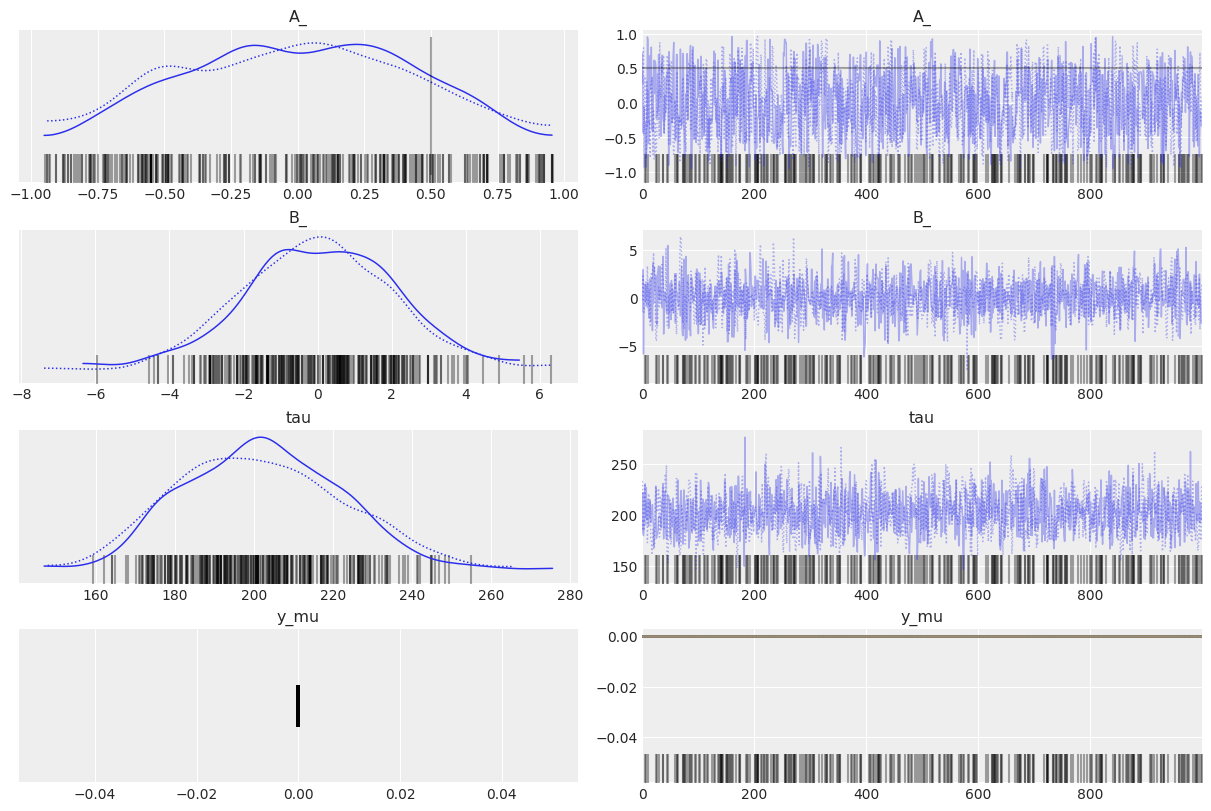

In [23]:
az.style.use("arviz-darkgrid")

az.plot_trace(
    idata,
    lines=[
        ("A_", {}, A),
        ("tau_", {}, Q ** -2),
    ],
)